<a href="https://colab.research.google.com/github/sirbob12/Number_classification/blob/main/NUMBER_CLASSIFICATION_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digit Classification Using the MNIST Dataset**

## 🎯 **Introduction**

In this project, we’ll explore the **MNIST dataset** — a collection of **70,000 grayscale images** of handwritten digits (0-9). Each image is **28x28 pixels**, making it an ideal starting point for computer vision tasks.  

The goal is to build a **machine learning model** that can accurately recognize digits from these handwritten samples — mimicking how a postal system might automatically read zip codes or how a bank processes handwritten checks.

We’ll walk through:  
- 📥 **Loading and visualizing the data**  
- 🛠️ **Preprocessing the images for better performance**  
- 🧠 **Building and training a classification model**  
- 📊 **Evaluating the model’s accuracy on unseen data**  

This project is a great introduction to deep learning and computer vision, serving as a foundation for tackling more complex image recognition challenges. Let’s dive in! 🚀

## LIBRARIES
### Lets import the libraries needed for this project

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## 📥 **Loading and visualizing the data**

In [3]:
### lets import the dataset from mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

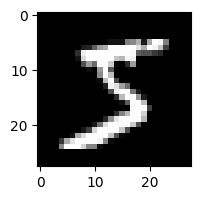

In [4]:
### Lets visualize the data first
plt.figure(figsize=(3,2))
plt.imshow(X_train[0], cmap='gray')
plt.show()

# 🛠️ **Pre-Processing the images for better performance**
Lets pre-process the data by carrying out the following:  

Normalizing the dataset.  

Note: The dataset is from tensorflow and has already been cleaned.

In [5]:
## Lets normalize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## 🧠 **Building and training the classification model**
First we'll use an artificial neural network (ANN).  
Then we'll use a convolutional neural network (CNN).  
And then we'll compare which of the networks performs better.

In [8]:
## Lets start with an artificial neural network

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8736 - loss: 0.4490 - val_accuracy: 0.9583 - val_loss: 0.1399
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9654 - loss: 0.1215 - val_accuracy: 0.9711 - val_loss: 0.0928
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0771 - val_accuracy: 0.9703 - val_loss: 0.0921
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9825 - loss: 0.0571 - val_accuracy: 0.9725 - val_loss: 0.0846
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9876 - loss: 0.0429 - val_accuracy: 0.9742 - val_loss: 0.0769
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9772 - val_loss: 0.0762
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9776 - val_loss: 0.0760
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9938 - loss: 0.0202

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

## Evaluate

In [10]:
model_eval  = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {model_eval[1]:.2f}")
print(f"Test Loss: {model_eval[0]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1054
Test Accuracy: 0.98
Test Loss: 0.09


##### The performance of the ANN is very high here... however lets try the CNN

## **CONVOLUTIONAL NEURAL NETWORK**

 First we need to reshape the data as a convolutional model expects a 4 dim array

In [11]:
## Lets reshape the X_train and X_test dataset to sooth the CNN architecture
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((10000, 28, 28, 1), (10000,), (60000, 28, 28, 1), (60000,))

In [32]:
### Lets normalize the dataset
X_test = X_test/255.0
X_train = X_train/255.0

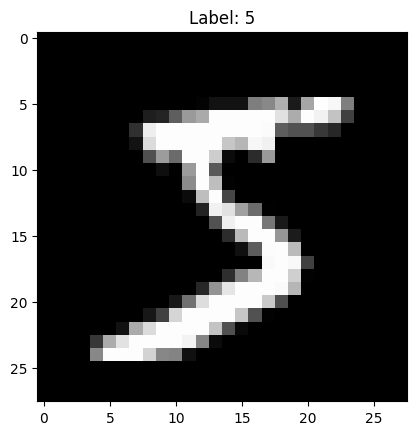

In [13]:
###Lets build and train the CNN

plt.imshow(X_train[0].reshape(28, 28), cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [20]:
## Build and train model

model_1 = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile the model
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_1.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8632 - loss: 0.4165 - val_accuracy: 0.9856 - val_loss: 0.0410
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9776 - loss: 0.0774 - val_accuracy: 0.9875 - val_loss: 0.0378
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9832 - loss: 0.0558 - val_accuracy: 0.9894 - val_loss: 0.0301
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9855 - loss: 0.0474 - val_accuracy: 0.9911 - val_loss: 0.0269
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9879 - loss: 0.0391 - val_accuracy: 0.9909 - val_loss: 0.0285
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9927 - val_loss: 0.0228
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9920 -

In [22]:
### lets evaluate the model
model_eval_1  = model_1.evaluate(X_test, y_test)
print(f"Test Accuracy: {model_eval_1[1]:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9901 - loss: 0.0339
Test Accuracy: 0.99
